# Risk Analysis of Covid19 Virus
As the outbreak of coronavirus disease 2019 (COVID-19) progresses, epidemiological data are needed to guide situational awareness and intervention strategies. The enormous impact of the COVID-19 pandemic is obvious. What many still haven’t realized, however, is that the impact on ongoing data science production setups has been dramatic, too. Artificial Intelligence is actively used in identifying high risk patients at an earlier stage and therefore helps to control the spread of the infection in real-time. This becomes particularly important at this time of crisis because real time monitoring is the best option for people to self-isolate and mitigate the spread of the virus.

Objective: This is an open-research project that a healthcare institute will use to determine the risk factor of second-level contacts traced for a COVID19 Positive patient. This study will also lead to deciding which all factors should be considered for a healthcare institute to open a dedicated testing-quarantine labs and/or predict the possibility of a zone turning into a hotspot.

In [3]:
#Importing the required libraries
import pandas as pd
import numpy as np

#visualisation library
import matplotlib.pyplot as plt
import seaborn as sns

#library for machine learning algorithm
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import ExtraTreesRegressor,RandomForestClassifier,GradientBoostingClassifier

#disable warnings
import warnings
warnings.filterwarnings('ignore')

#Operating System,pickle
import os
import pickle

D:\anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Data Collection:Get the data from APIs

Data has been collected by Tanmoy Mukherjee (https://www.kaggle.com/tanmoyx).Dataset has been taken from kaggle with URL as: https://www.kaggle.com/tanmoyx/covid19-patient-precondition-dataset?select=covid.csv .
Data is being collected by the Mexican goverment, it contains a large number of anonymised patient-related  information such as pre-existing conditions, gender, age, symptom date and entry date. The data contains patient information around the world.

Feature Set:
he data set contains 993,197 records, the data dictionary is provided as below:

1. id: The identification number of the patient.

2. sex: Identify gender of the patient, 1 as female and 2 as male.

3. patient_type: Type of patient, 1 for not hospitalized and 2 for hosptalized.

4. entry_date: The date that the patient went to the hospital.

5. date_symptoms: The date that the patient started to show symptoms.

6. date_died: The date that the patient died, "9999-99-99" stands for recovered.

7. intubed: Intubation is a procedure that's used when you can't breathe on your own. Your doctor puts a tube down your throat and into your windpipe to make it easier to get air into and out of your lungs. A machine called a ventilator pumps in air with extra oxygen. Then it helps you breathe out air that’s full of carbon dioxide (CO2). "1" denotes that the patient used ventilator and "2" denotes that the patient did not, "97" "98" "99" means not specified.

8. pneumonia: Indicates whether the patient already have air sacs inflammation or not "1" for yes, "2" for no, "97" "98" "99" means not specified.

9. age: Specifies the age of the patient.

10. pregnancy: Indicates whether the patient is pregnant or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.

11. diabetes: Indicates whether the patient has diabetes or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.

12. copd: Indicates whether the patient has Chronic obstructive pulmonary disease (COPD) or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.

13. asthma: Indiactes whether the patient has asthma or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.

14. inmsupr: Indicates whether the patient is immunosuppressed or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.

15. hypertension: Indicates whether the patient has hypertension or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.

16. other_disease: Indicates whether the patient has other disease or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.

17. cardiovascular: Indicates whether if the patient has heart or blood vessels realted disease, "1" for yes, "2" for no, "97" "98" "99" means not specified.

18. obesity: Indicates whether the patient is obese or not,  "1" for yes, "2" for no, "97" "98" "99" means not specified.

19. renal_chronic: Indicates whether the patient has chronic renal disease or not,  "1" for yes, "2" for no, "97" "98" "99" means not specified.

20. tobacco: Indicates whether if the patient is a tobacco user, "1" for yes, "2" for no, "97" "98" "99" means not specified.

21. contact_other_covid: Indicates whether if the patient has contacted another covid19 patient.

22. covid_res: RESULT Identifies the result of the analysis of the sample reported by the laboratory of the National Network of Epidemiological Surveillance Laboratories (INDRE, LESP and LAVE). ( "1" for positive,"2" for negative, "3" for result is pending.

22. icu: Indicates whether the if the patient had been admitted to an Intensive Care Unit (ICU), "1" for yes, "2" for no, "97" "98" "99" means not specified.


In [4]:
current_path = os.getcwd()
assets_path = os.path.join(current_path, "assets")
data_path= os.path.join(assets_path, "covid.csv")
df=pd.read_csv(data_path)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,566602.0,1.506726,0.499955,1.0,1.0,2.0,2.0,2.0
patient_type,566602.0,1.215165,0.410937,1.0,1.0,1.0,1.0,2.0
intubed,566602.0,76.562952,39.058676,1.0,97.0,97.0,97.0,99.0
pneumonia,566602.0,1.846262,0.560939,1.0,2.0,2.0,2.0,99.0
age,566602.0,42.622483,16.659973,0.0,31.0,41.0,53.0,120.0
pregnancy,566602.0,50.400692,47.501579,1.0,2.0,97.0,97.0,98.0
diabetes,566602.0,2.210633,5.683523,1.0,2.0,2.0,2.0,98.0
copd,566602.0,2.280221,5.327832,1.0,2.0,2.0,2.0,98.0
asthma,566602.0,2.265029,5.334658,1.0,2.0,2.0,2.0,98.0
inmsupr,566602.0,2.319628,5.667381,1.0,2.0,2.0,2.0,98.0


In [6]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04/05/2020,02/05/2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19/03/2020,17/03/2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06/04/2020,01/04/2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17/04/2020,10/04/2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13/04/2020,13/04/2020,22/04/2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [7]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [9]:
#converting numerical features to proper categories
df.sex.replace({1: 'Female', 2: 'Male'}, inplace=True)
df.patient_type.replace({1: 'Outpatient', 2: 'Inpatient'}, inplace=True)
df.intubed.replace({1: 'Yes', 2: 'No',97:'Not Specified', 98:'Not Specified',99:'Not Specified'}, inplace=True)
df.pneumonia.replace({1: 'Yes', 2: 'No', 98:'Not Specified',99:'Not Specified', 97:'Not Specified'}, inplace=True)
df.pregnancy.replace({1: 'Yes', 2: 'No', 99:'Not Specified',98:'Not Specified', 97:'Not Specified'}, inplace=True)
df.diabetes.replace({1:'Yes', 2: 'No', 99:'Not Specified',98:'Not Specified', 97:'Not Specified'}, inplace=True)
df.copd.replace({1:'Yes', 2: 'No', 99:'Not Specified',98:'Not Specified', 97:'Not Specified'}, inplace=True)
df.asthma.replace({1:'Yes', 2: 'No', 99:'Not Specified',98:'Not Specified', 97:'Not Specified'}, inplace=True)
df.inmsupr.replace({1:'Yes', 2: 'No', 99:'Not Specified',98:'Not Specified', 97:'Not Specified'}, inplace=True)
df.hypertension.replace({1:'Yes', 2: 'No', 99:'Not Specified',98:'Not Specified', 97:'Not Specified'}, inplace=True)
df.other_disease.replace({1:'Yes', 2: 'No', 99:'Not Specified',98:'Not Specified', 97:'Not Specified'}, inplace=True)
df.cardiovascular.replace({1:'Yes', 2: 'No', 99:'Not Specified',98:'Not Specified', 97:'Not Specified'}, inplace=True)
df.obesity.replace({1:'Yes', 2: 'No', 99:'Not Specified',98:'Not Specified', 97:'Not Specified'}, inplace=True)
df.renal_chronic.replace({1:'Yes', 2: 'No', 99:'Not Specified',98:'Not Specified', 97:'Not Specified'}, inplace=True)
df.tobacco.replace({1:'Yes', 2: 'No', 99:'Not Specified',98:'Not Specified', 97:'Not Specified'}, inplace=True)
df.contact_other_covid.replace({1: 'Yes', 2: 'No', 97:'Not Specified',99:'Not Specified',98:'Not Specified'}, inplace=True)
df.covid_res.replace({1: 'Positive', 2: 'Negative', 3:'Awaiting Results'}, inplace=True)
df.icu.replace({1: 'Yes', 2: 'No', 97:'Not Specified',98:'Not Specified', 99:'Not Specified'}, inplace=True)


In [10]:
cat_features=df.select_dtypes(include='object').columns.tolist()
print("Categorical Features:",cat_features)
num_features=df.select_dtypes(exclude='object').columns.tolist()
print("Numerical Features:",num_features)

Categorical Features: ['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died', 'intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid', 'covid_res', 'icu']
Numerical Features: ['age']


In [11]:
#Dates
df['date_died'].replace('9999-99-99','Not Applicable',inplace=True)
date_fields=['entry_date','date_symptoms']
for dates in date_fields:
    df[dates]=pd.to_datetime(df[dates],infer_datetime_format=True)

In [12]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,Male,Outpatient,2020-04-05,2020-02-05,Not Applicable,Not Specified,No,27,Not Specified,...,No,No,No,No,No,No,No,No,Positive,Not Specified
1,1009bf,Male,Outpatient,2020-03-19,2020-03-17,Not Applicable,Not Specified,No,24,Not Specified,...,No,No,No,No,No,No,No,Not Specified,Positive,Not Specified
2,167386,Female,Inpatient,2020-06-04,2020-01-04,Not Applicable,No,No,54,No,...,No,No,No,No,Yes,No,No,Not Specified,Positive,No
3,0b5948,Male,Inpatient,2020-04-17,2020-10-04,Not Applicable,No,Yes,30,Not Specified,...,No,No,No,No,No,No,No,Not Specified,Positive,No
4,0d01b5,Female,Inpatient,2020-04-13,2020-04-13,22/04/2020,No,No,60,No,...,No,Yes,No,Yes,No,No,No,Not Specified,Positive,No


# 2. Exploratory Data Analysis

Negative            279035
Positive            220657
Awaiting Results     66910
Name: covid_res, dtype: int64


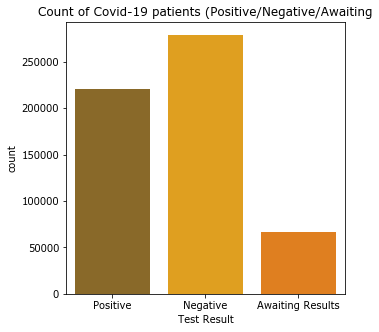

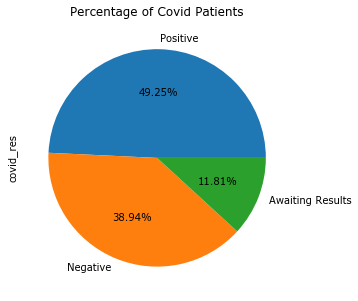

In [11]:
#count of Covid-19 positive and negative patients
df1=df.copy()
print(df1.covid_res.value_counts())

plt.figure(figsize=(5,5))
plt.title("Count of Covid-19 patients (Positive/Negative/Awaiting")
sns.countplot(df1['covid_res'],palette='autumn_d')
plt.xticks(ticks=np.arange(3),labels=['Positive','Negative','Awaiting Results'])
plt.xlabel("Test Result")
plt.show()

plt.figure(figsize=(5,5))
plt.title("Percentage of Covid Patients")
df1['covid_res'].value_counts().plot(kind='pie',labels=['Positive','Negative','Awaiting Results'],autopct="%1.2f%%")
plt.show()

Male      287112
Female    279490
Name: sex, dtype: int64


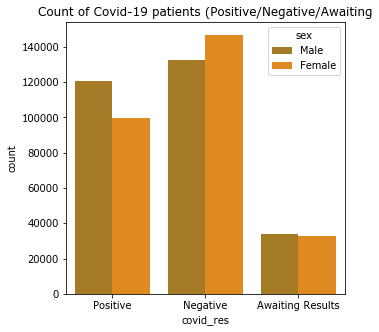

In [12]:
#count of genderwise Covid-19 positive and negative patients
print(df1.sex.value_counts())

plt.figure(figsize=(5,5))
plt.title("Count of Covid-19 patients (Positive/Negative/Awaiting")
sns.countplot(x='covid_res',hue='sex',data=df1,palette='autumn_d')
plt.show()

Outpatient    444689
Inpatient     121913
Name: patient_type, dtype: int64


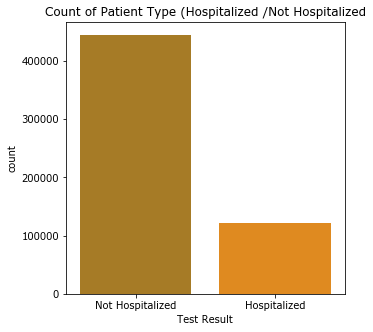

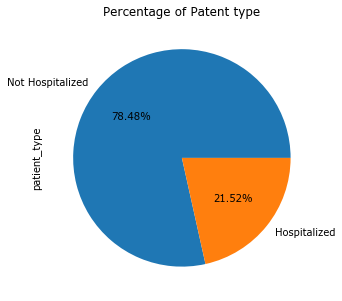

In [13]:
#count of Covid-19 positive and negative patients
df1=df.copy()
print(df1.patient_type.value_counts())

plt.figure(figsize=(5,5))
plt.title("Count of Patient Type (Hospitalized /Not Hospitalized")
sns.countplot(df1['patient_type'],palette='autumn_d')
plt.xticks(ticks=np.arange(2),labels=['Not Hospitalized','Hospitalized'])
plt.xlabel("Test Result")
plt.show()

plt.figure(figsize=(5,5))
plt.title("Percentage of Patent type")
df1['patient_type'].value_counts().plot(kind='pie',labels=['Not Hospitalized','Hospitalized'],autopct="%1.2f%%")
plt.show()

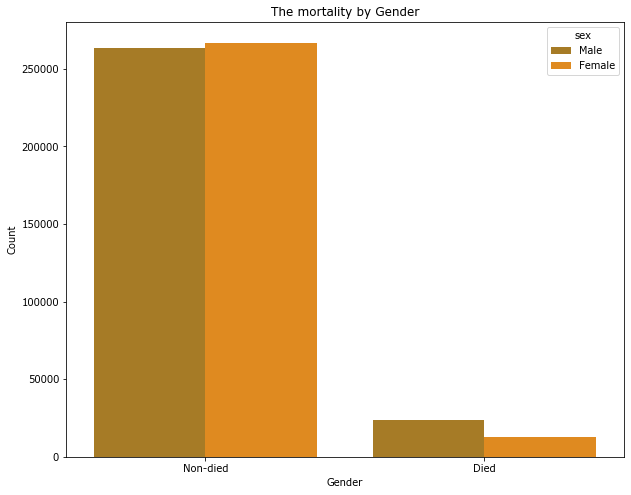

In [14]:
#Analysis of Mortality by Gender
df1['died'] = df1['date_died'].apply(lambda x: 'Non-died' if x == "Not Applicable" else 'Died')

fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x ='died', hue ='sex', data = df1,palette='autumn_d')
plt.title('The mortality by Gender')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

Text(-2.075000000000003, 0.5, 'Count')

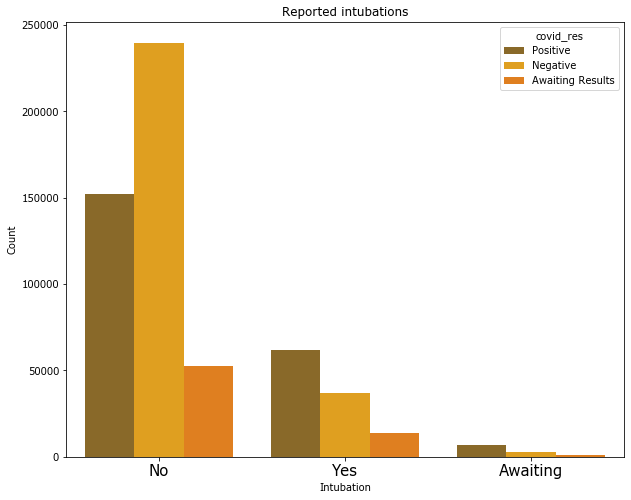

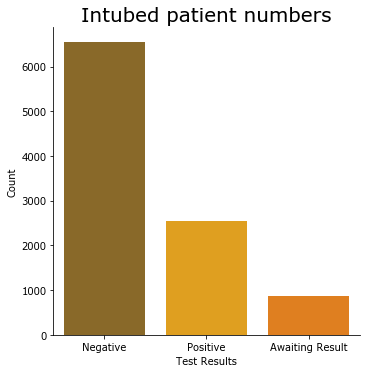

In [15]:
#Intubed
plt.figure(figsize=(10,8))
sns.countplot('intubed',hue='covid_res',data=df1,palette='autumn_d')
plt.xticks(size=15,)
plt.xlabel('Intubation')
plt.xticks(ticks=np.arange(3),labels=['No','Yes','Awaiting'])
plt.ylabel('Count')
plt.title('Reported intubations')

df_in=df1[df1['intubed']=='Yes']
sns.catplot('covid_res',data=df_in,kind='count',palette='autumn_d')
plt.title('Intubed patient numbers',size=20)
plt.xlabel('Test Results')
plt.xticks(np.arange(3),labels=["Negative","Positive","Awaiting Result"])
plt.ylabel("Count")

Text(0.5, 1.0, 'Covid-19 patient with Pneumonia ')

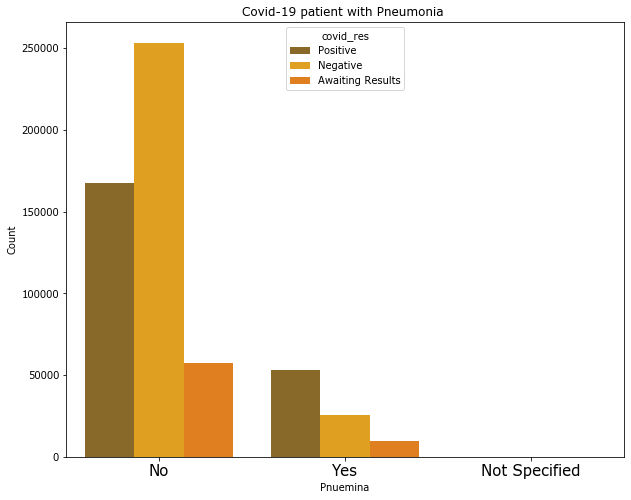

In [16]:
#Pneumonia
plt.figure(figsize=(10,8))
sns.countplot('pneumonia',hue='covid_res',data=df1,palette='autumn_d')
plt.xticks(size=15,)
plt.xlabel('Pnuemina')
plt.xticks(ticks=np.arange(3),labels=['No','Yes','Not Specified'])
plt.ylabel('Count')
plt.title('Covid-19 patient with Pneumonia ')

Text(0.5, 1.0, 'COVID +ve case fatality with respect to Age')

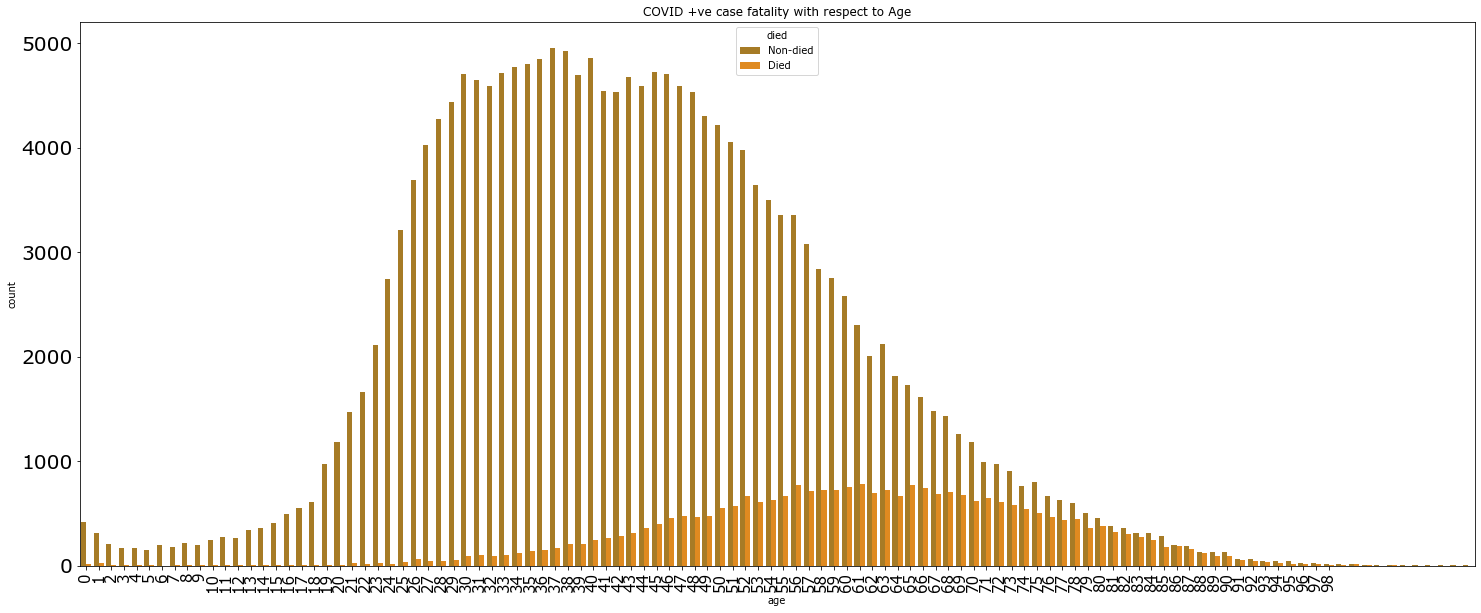

In [17]:
#fatality with respect to Age
plt.figure(figsize=(25,10))
df_pos=df1[df1['covid_res']=='Positive']
sns.countplot('age',hue='died',data=df_pos,palette='autumn_d')
plt.xticks(ticks=np.arange(0,99),size=15,rotation=90)
plt.yticks(size=20)
plt.title('COVID +ve case fatality with respect to Age')

Other patient medical conditions:
We shall now check how the comorbidities or medical conditions such as pregnancy effects fatality of patients.Pneumonia, Cardiovascular, Pregnancy, Obesity. Let us check how the patients with the above medical conditions have fared.

Text(0.5, 0, 'Fatality rate: 15.70 %')

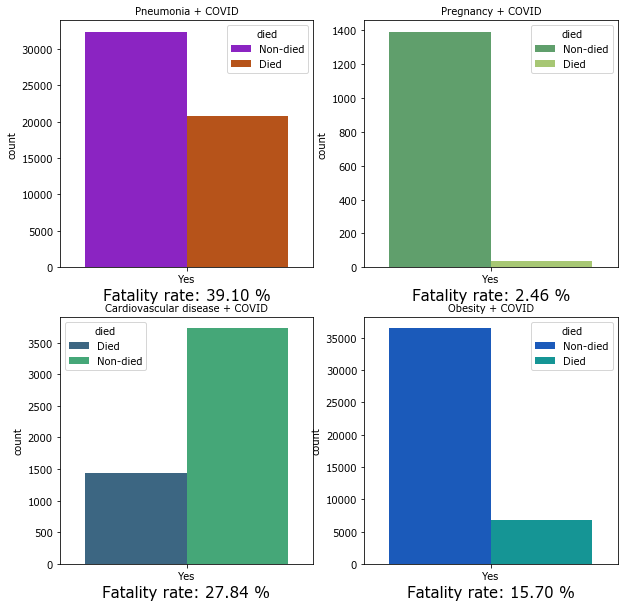

In [18]:
fig2=plt.figure(figsize=(10,10))
ax1=fig2.add_subplot(2,2,1)
ax2=fig2.add_subplot(2,2,2)
ax3=fig2.add_subplot(2,2,3)
ax4=fig2.add_subplot(2,2,4)
df_pneu=df_pos[df_pos['pneumonia']=='Yes']
df_preg=df_pos[df_pos['pregnancy']=='Yes']
df_card=df_pos[df_pos['cardiovascular']=='Yes']
df_obes=df_pos[df_pos['obesity']=='Yes']


sns.countplot('pneumonia',data=df_pneu,hue='died',ax=ax1,palette='gnuplot')
sns.countplot('pregnancy',data=df_preg,hue='died',ax=ax2,palette='summer')
sns.countplot('cardiovascular',data=df_card,hue='died',ax=ax3,palette='viridis')
sns.countplot('obesity',data=df_obes,hue='died',ax=ax4,palette='winter')

ax1.set_title('Pneumonia + COVID',size=10)
ax2.set_title('Pregnancy + COVID',size=10)
ax3.set_title('Cardiovascular disease + COVID',size=10)
ax4.set_title('Obesity + COVID',size=10)

ax1.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_pneu['died'].value_counts()[1]/df_pneu['died'].shape[0]),size=15)
ax2.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_preg['died'].value_counts()[1]/df_preg['died'].shape[0]),size=15)
ax3.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_card['died'].value_counts()[1]/df_card['died'].shape[0]),size=15)
ax4.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_obes['died'].value_counts()[1]/df_obes['died'].shape[0]),size=15)

For patients with comorbities such as pneumonia, obesity or cardiovascular diseases, the fatality is higher.
Pregancy doesn't lead to any significant increase in fatality.

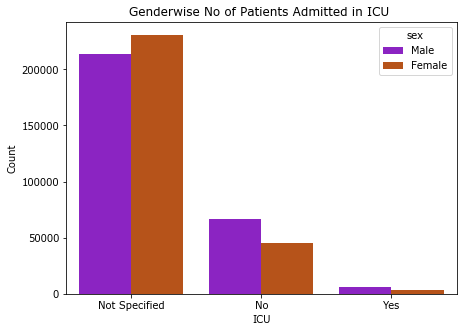

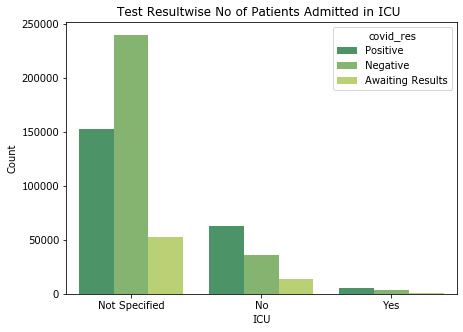

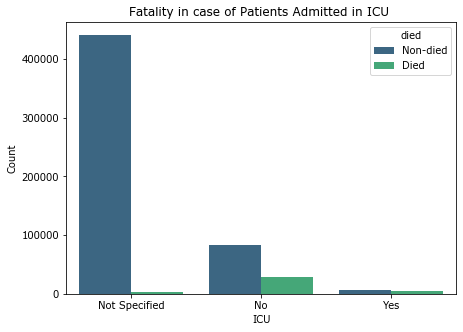

In [19]:
plt.figure(figsize=(7,5))
sns.countplot(x='icu',data=df1,hue='sex',palette='gnuplot')
plt.title("Genderwise No of Patients Admitted in ICU ")
plt.xlabel("ICU")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(7,5))
sns.countplot(x='icu',data=df1,hue='covid_res',palette='summer')
plt.title("Test Resultwise No of Patients Admitted in ICU ")
plt.xlabel("ICU")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(7,5))
sns.countplot(x='icu',data=df1,hue='died',palette='viridis')
plt.title("Fatality in case of Patients Admitted in ICU ")
plt.xlabel("ICU")
plt.ylabel("Count")
plt.show()

# 3. Feature Engineering

Handling Missing Values

In [34]:
#No null alues to handle
df.isna().sum() 
df.isnull().sum()

id                     0
sex                    0
patient_type           0
entry_date             0
date_symptoms          0
date_died              0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  object
 2   patient_type         566602 non-null  object
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  object
 7   pneumonia            566602 non-null  object
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  object
 10  diabetes             566602 non-null  object
 11  copd                 566602 non-null  object
 12  asthma               566602 non-null  object
 13  inmsupr              566602 non-null  object
 14  hypertension         566602 non-null  object
 15  other_disease        566602 non-nu

In [36]:
final_df=df.copy()
final_df.drop(['id','entry_date','date_symptoms','date_died'],axis=1,inplace=True)

In [37]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [38]:
cat_features=final_df.select_dtypes(include='object').columns.tolist()
le=LabelEncoder()
for col in cat_features:
    final_df[col]=le.fit_transform(final_df[col])
    

In [39]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   sex                  566602 non-null  int32
 1   patient_type         566602 non-null  int32
 2   intubed              566602 non-null  int32
 3   pneumonia            566602 non-null  int32
 4   age                  566602 non-null  int64
 5   pregnancy            566602 non-null  int32
 6   diabetes             566602 non-null  int32
 7   copd                 566602 non-null  int32
 8   asthma               566602 non-null  int32
 9   inmsupr              566602 non-null  int32
 10  hypertension         566602 non-null  int32
 11  other_disease        566602 non-null  int32
 12  cardiovascular       566602 non-null  int32
 13  obesity              566602 non-null  int32
 14  renal_chronic        566602 non-null  int32
 15  tobacco              566602 non-null  int32
 16  co

In [17]:
final_df.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,1,1,1,0,27,1,0,0,0,0,0,0,0,0,0,0,0,2,1
1,1,1,1,0,24,1,0,0,0,0,0,0,0,0,0,0,1,2,1
2,0,0,0,0,54,0,0,0,0,0,0,0,0,2,0,0,1,2,0
3,1,0,0,2,30,1,0,0,0,0,0,0,0,0,0,0,1,2,0
4,0,0,0,0,60,0,2,0,0,0,2,0,2,0,0,0,1,2,0


In [40]:
#Lets drop samples with covid test results are as : "Awaiting Result"

final_df=final_df[(final_df['covid_res']==1) | (final_df['covid_res']==2)]

In [41]:
print(df.shape)
print(final_df.shape)

(566602, 23)
(499692, 19)


In [42]:
final_df['covid_res'].replace({2:'Positive',1:'Negative'},inplace=True)
final_df['covid_res'].replace({'Positive':1,'Negative':0},inplace=True)


In [43]:
final_df.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,1,1,1,0,27,1,0,0,0,0,0,0,0,0,0,0,0,1,1
1,1,1,1,0,24,1,0,0,0,0,0,0,0,0,0,0,1,1,1
2,0,0,0,0,54,0,0,0,0,0,0,0,0,2,0,0,1,1,0
3,1,0,0,2,30,1,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,60,0,2,0,0,0,2,0,2,0,0,0,1,1,0


In [ ]:
## Train-Test Split
x=final_df.drop('covid_res',axis=1)
y=final_df['covid_res']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
        
#Feature Scaling
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
    
model=LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

cv_score=cross_val_score(model,x,y,cv=20)
print(np.mean(cv_score))


# One-Hot Encoding 

In [ ]:
#using one-hot Encoding
final_df=df.copy()
final_df.drop(['id','entry_date','date_symptoms','date_died'],axis=1,inplace=True)

In [ ]:
#Lets drop samples with covid test results are as : "Awaiting Result"
final_df['covid_res'].replace({'Positive':1,'Negative':0,'Awaiting Results':2},inplace=True)
final_df=final_df[(final_df['covid_res']==1) | (final_df['covid_res']==0)]
final_df.info()

In [ ]:
final_df.columns

In [ ]:
final_df=pd.get_dummies(final_df,drop_first=True)
final_df.info()

In [ ]:
final_df.head()

In [ ]:
#Train-Test Split
x=final_df.drop('covid_res',axis=1)
y=final_df['covid_res']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
        
#Feature Scaling
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
    
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

#cross validation
cv_score=cross_val_score(model,x,y,cv=20)
print(np.mean(cv_score))


In [ ]:
model=ExtraTreesRegressor()
model.fit(x,y)

print(model.feature_importances_)
#plot graph to sho feature importance
df1=pd.Series(model.feature_importances_,index=x.columns)
df1.nlargest(10).plot(kind='barh')


In [ ]:
x=final_df[['age','patient_type_Outpatient','contact_other_covid_Not Specified','pneumonia_Yes','hypertension_Yes','diabetes_Yes','obesity_Yes','cardiovascular_Yes','pregnancy_Not Specified','other_disease_Yes']]
y=final_df['covid_res']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
        
#Feature Scaling
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
    
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

cv_score=cross_val_score(model,x,y,cv=20)
print(np.mean(cv_score))

# PCA

In [ ]:
final_df=df.copy()
final_df.drop(['id','entry_date','date_symptoms','date_died'],axis=1,inplace=True)
#Lets drop samples with covid test results are as : "Awaiting Result"
final_df['covid_res'].replace({'Positive':1,'Negative':0,'Awaiting Results':2},inplace=True)
final_df=final_df[(final_df['covid_res']==1) | (final_df['covid_res']==0)]
y=final_df['covid_res']
final_df.drop(['covid_res'],axis=1,inplace=True)

In [ ]:
cat_features=final_df.select_dtypes(include='object').columns.tolist()
le=LabelEncoder()
for col in cat_features:
    final_df[col]=le.fit_transform(final_df[col])

In [ ]:
final_df.info()
x=final_df.values
x.shape
y.shape

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','PC3','PC4'])

In [ ]:
principalDf

In [ ]:
x = principalDf
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

    
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

cv_score=cross_val_score(model,x,y,cv=20)
print(np.mean(cv_score))

# ADABoost

In [ ]:
final_df=df.copy()
final_df.drop(['id','entry_date','date_symptoms','date_died'],axis=1,inplace=True)
#Lets drop samples with covid test results are as : "Awaiting Result"
final_df['covid_res'].replace({'Positive':1,'Negative':0,'Awaiting Results':2},inplace=True)
final_df=final_df[(final_df['covid_res']==1) | (final_df['covid_res']==0)]
y=final_df['covid_res']
final_df.drop(['covid_res'],axis=1,inplace=True)
cat_features=final_df.select_dtypes(include='object').columns.tolist()
le=LabelEncoder()
for col in cat_features:
    final_df[col]=le.fit_transform(final_df[col])

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

x=final_df.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

model=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print ("Adaboost Accuracy:",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
cv_score=cross_val_score(model,x,y,cv=20)
print(np.mean(cv_score))

# GradientBoosting-Classifier with Hyperparameter Tuning


In [13]:
final_df=df.copy()
final_df.drop(['id','patient_type','entry_date','date_symptoms','date_died','intubed','tobacco','icu'],axis=1,inplace=True)
#Lets drop samples with covid test results are as : "Awaiting Result"
final_df['covid_res'].replace({'Positive':1,'Negative':0,'Awaiting Results':2},inplace=True)
final_df=final_df[(final_df['covid_res']==1) | (final_df['covid_res']==0)]
y=final_df['covid_res']
final_df.drop(['covid_res'],axis=1,inplace=True)
cat_features=final_df.select_dtypes(include='object').columns.tolist()
le=LabelEncoder()
for col in cat_features:
    final_df[col]=le.fit_transform(final_df[col])
x=final_df.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

Parameter Tuning for tree based parameters

In [15]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [16]:
model = GradientBoostingClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print ("GradientBoost Accuracy:",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

GradientBoost Accuracy: 0.633788723750567
[[69722 13990]
 [40908 25288]]
              precision    recall  f1-score   support

           0       0.63      0.83      0.72     83712
           1       0.64      0.38      0.48     66196

    accuracy                           0.63    149908
   macro avg       0.64      0.61      0.60    149908
weighted avg       0.64      0.63      0.61    149908



In [17]:
pickle_path=os.path.join(current_path,"assets","covid_pickle.pkl")

with open(pickle_path, "wb") as f:
    pickle.dump(model, f)
print("Pickle File created at {}".format(pickle_path))


Pickle File created at C:\Users\om\Healthcare-Covd19-Risk-Analysis\new covid data\assets\covid_pickle.pkl


In [19]:
final_df.pneumonia.unique()

array([0, 2, 1])